When to Use

Use Gaussian NB when your features are continuous numeric values that follow a normal (Gaussian) distribution.

Examples of datasets

Iris dataset (petal length, sepal width → continuous numeric)

Any dataset with continuous measurements (height, age, temperature)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
data = load_iris()
X = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


2. Multinomial Naive Bayes (MNB)
When to Use

Use Multinomial NB when the data consists of counts, especially in text classification where features represent:

word frequencies

TF-IDF scores

number of occurrences of events

Examples of datasets

Spam vs Ham emails

News article classification

NLP problems involving word counts

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
texts = [
    "Win money now", "You won a prize",
    "Let's meet tomorrow", "Are you coming today?"
]
labels = ["spam", "spam", "ham", "ham"]

# Convert text → word count matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25)

# Train
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.0


3. Bernoulli Naive Bayes (BNB)
When to Use

Use Bernoulli NB when features are binary (0 or 1):

word present or not present (not counts)

yes/no data

binary indicators

Examples of datasets

Text classification using binary bag-of-words

Any dataset where features are:

0 = no

1 = yes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

texts = [
    "Win money now", "You won a prize",
    "Let's meet tomorrow", "Are you coming today?"
]
labels = ["spam", "spam", "ham", "ham"]

# Convert text → word count matrix
vectorizer = CountVectorizer(binary = True)
X = vectorizer.fit_transform(texts)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25)

# Train
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.0


4. Complement Naive Bayes (CNB)
When to Use

Use Complement NB for:

highly imbalanced text datasets

when Multinomial NB performs poorly

situations with rare class samples

Complement NB improves performance by using the complement of each class when computing probabilities.

Examples

Imbalanced spam datasets

Fake news detection

Sentiment analysis with imbalanced labels

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score

texts = [
    "Buy cheap meds now", "Win money today", "Meeting at 5 pm",
    "Project discussion tomorrow"
]
labels = ["spam", "spam", "ham", "ham"]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25)

model = ComplementNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


5. Categorical Naive Bayes (CatNB)
When to Use

Use Categorical NB when your features are categorical (not numeric):

color = {red, green, blue}

weather = {sunny, rainy, cloudy}

job = {teacher, engineer, doctor}

Features must be encoded as integers using OrdinalEncoder.

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Categorical dataset
X = np.array([
    ["sunny", "hot"],
    ["sunny", "mild"],
    ["rainy", "cold"],
    ["cloudy", "mild"]
])

y = np.array(["play", "play", "don’t play", "play"])

# Encode categorical features
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25)

# Train
model = CategoricalNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.0


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

for i in range(len(texts)):
  words = nltk.word_tokenize(texts[i])
  words = [lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
  sentences[i] = ' '.join(words)

In [ ]:
# Part of speech(POS) tagging

sentences = "Stemming helps in preprocessing text"
tokens = nltk.word_tokenize(sentences)
pos_tags = nltk.pos_tag(tokens)
print(pos_tags)

NameError: name 'nltk' is not defined

# **LINEAR REGRESSION**

In [ ]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
data = fetch_california_housing()
x=pd.DataFrame(data.data, columns = data.feature_names)
y=pd.Series(data.target, name = 'Price')

df = pd.concat([x, y],axis = 1)

print(df.head())
print(df.info())
print(df.isna())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup   

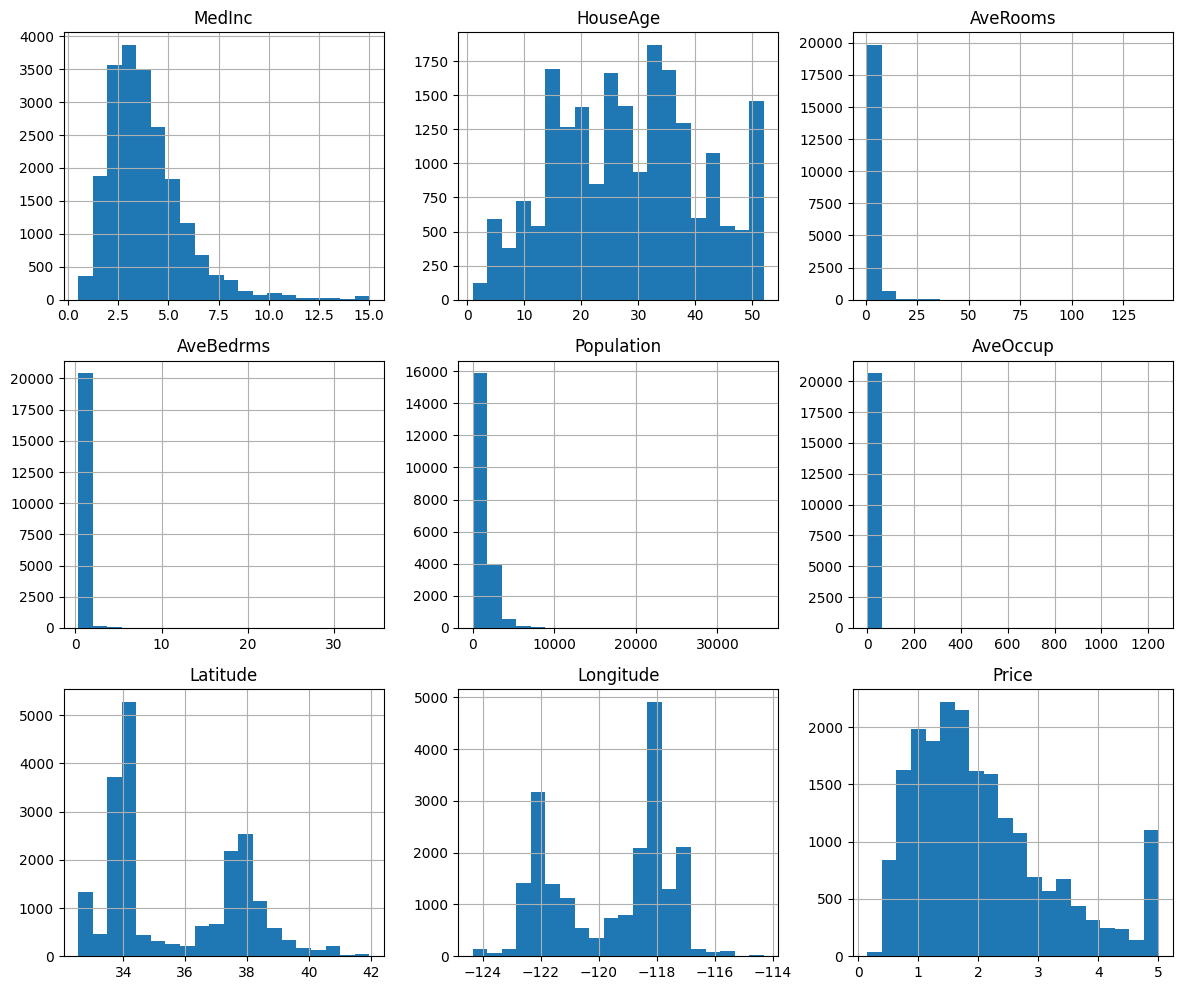

In [ ]:
df.hist(figsize=(12,10), bins = 20)
plt.tight_layout()
plt.show()

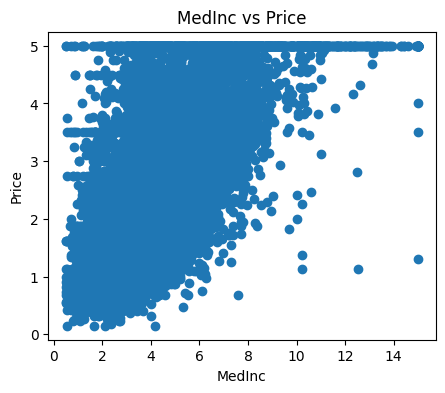

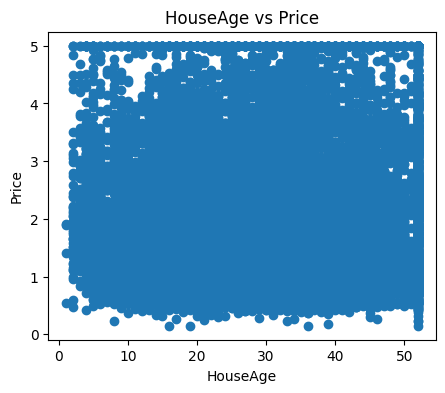

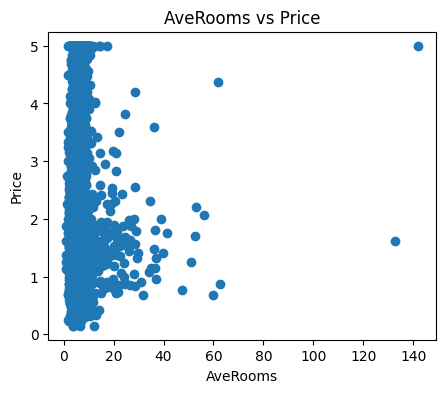

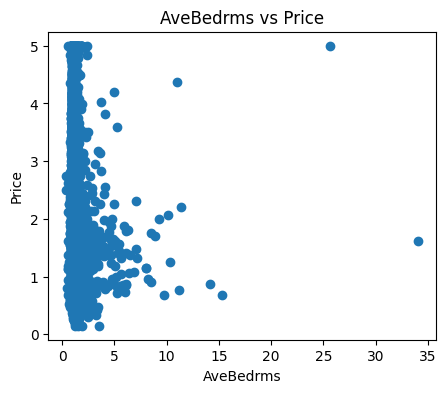

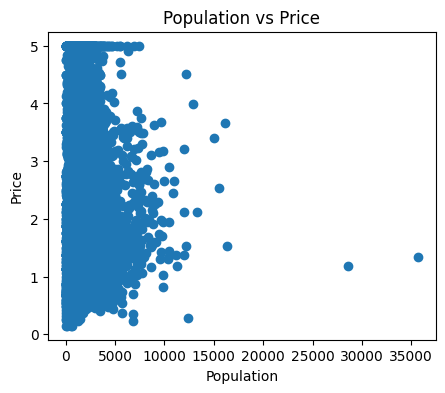

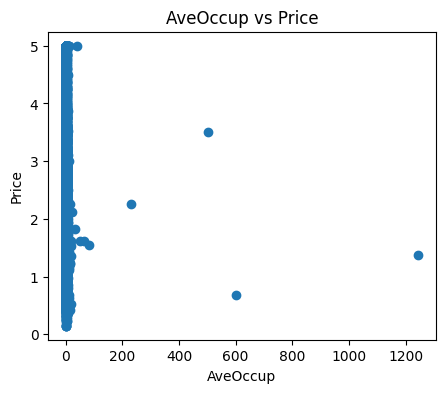

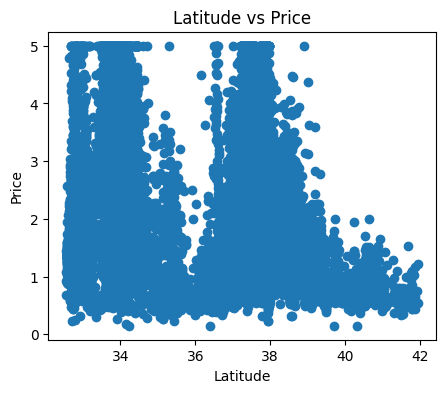

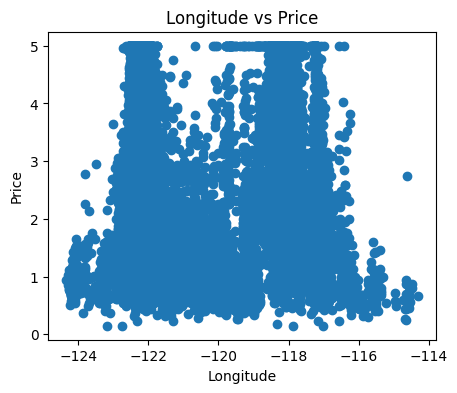

In [ ]:
for col in x.columns:
  plt.figure(figsize=(5,4))
  plt.scatter(df[col], y)
  plt.title(f"{col} vs Price")
  plt.xlabel(col)
  plt.ylabel("Price")
  plt.show()

In [ ]:
np.unique(df["Price"], return_counts=True)

(array([0.14999, 0.175  , 0.225  , ..., 4.991  , 5.     , 5.00001]),
 array([  4,   1,   4, ...,   1,  27, 965]))

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

print("R2 score: ", r2_score(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))

R2 score:  0.6090714420154287
MSE:  0.5127476282266809


Checking all seven assumptions of linear regression:

ValueError: x and y must be the same size

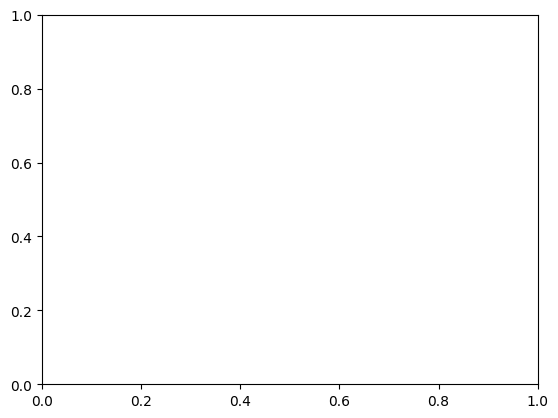

In [ ]:
# Assumption 1: Linearity
# -------------------------------
# Scatter plot already done in EDA
# If scatter shows straight-line trend → good

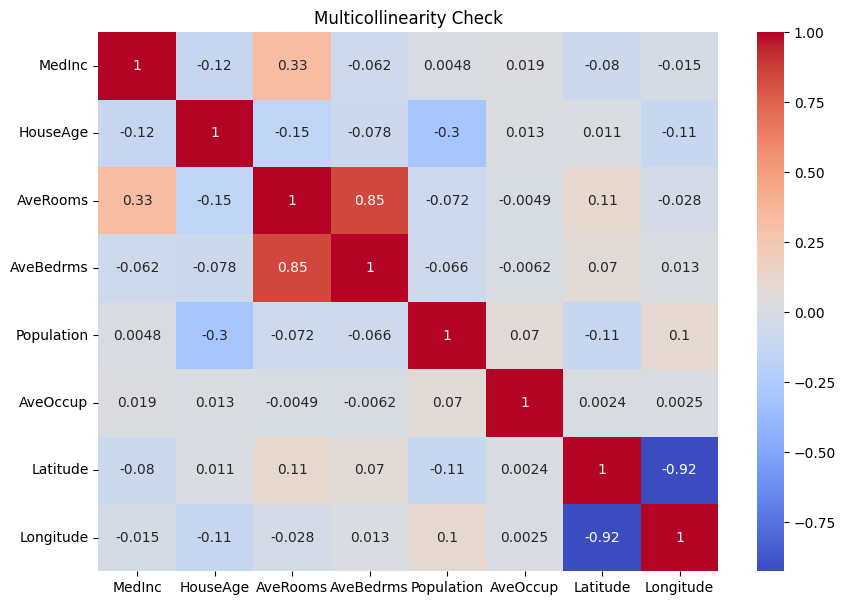

In [ ]:
# -------------------------------
# Assumption 2: No Multicollinearity
# -------------------------------
plt.figure(figsize=(10, 7))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm')
plt.title("Multicollinearity Check")
plt.show()

# If correlations > 0.8 → multicollinearity problem

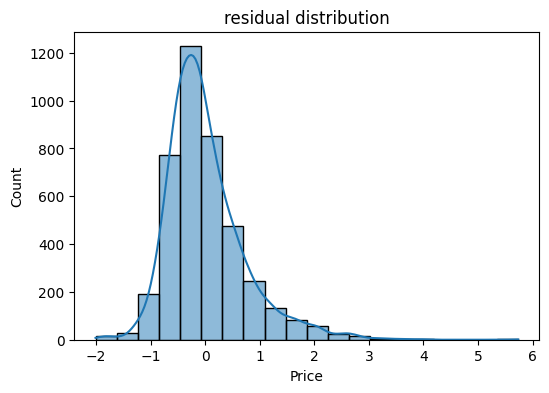

In [ ]:
# Assumption 3: Normality of residuals:
residuals = y_test - pred

plt.figure(figsize = (6, 4))
sns.histplot(residuals, kde = True, bins = 20)
plt.title("residual distribution")
plt.show()

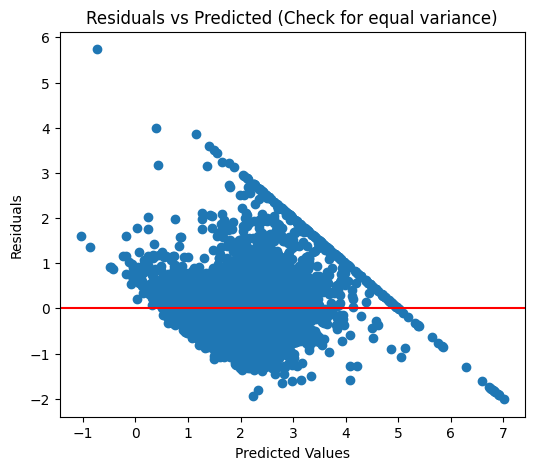

In [ ]:
# Assumption 4: Homoscedacity: equal variance in residuals and predeicted

plt.figure(figsize=(6,5))
plt.scatter(pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Check for equal variance)")
plt.show()

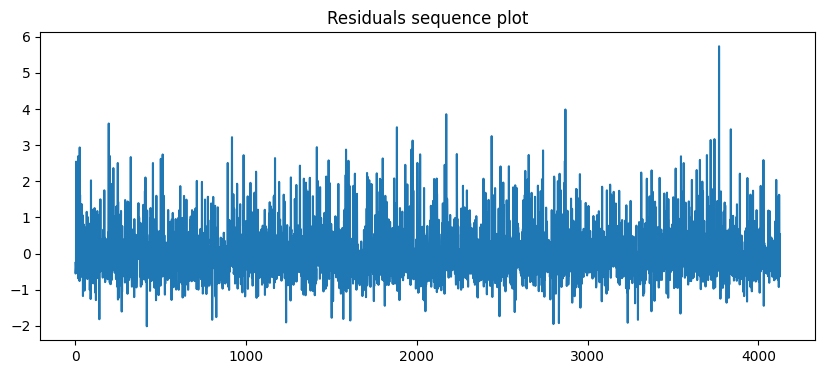

In [ ]:
# Assumption 5: No autocorrelation
plt.figure(figsize = (10, 4))
plt.plot(residuals.values)
plt.title("Residuals sequence plot")
plt.show()

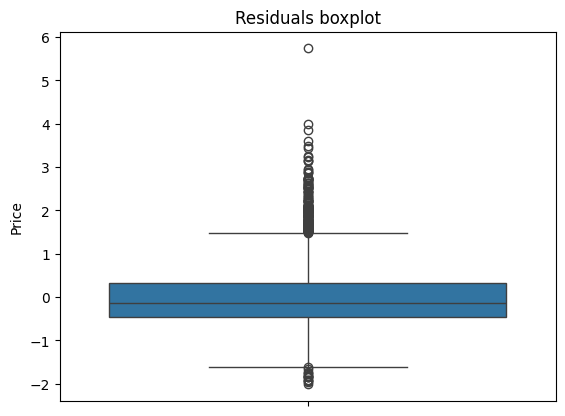

In [ ]:
# Assumption 6: No outliers
sns.boxplot(residuals)
plt.title("Residuals boxplot")
plt.show()

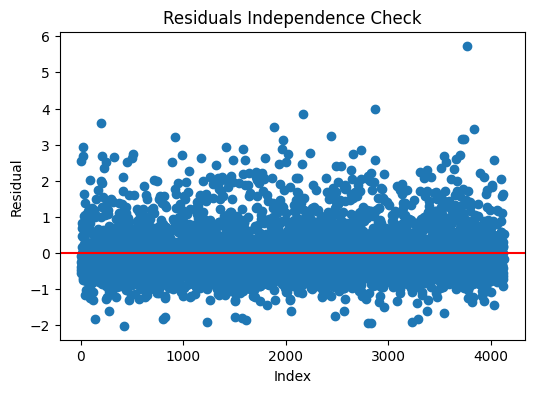

In [ ]:
# Simple scatter between index & residuals
plt.figure(figsize=(6,4))
plt.scatter(range(len(residuals)), residuals)
plt.axhline(0, color='red')
plt.title("Residuals Independence Check")
plt.xlabel("Index")
plt.ylabel("Residual")
plt.show()

Linear regression has several assumptions. To check whether these assumptions are satisfied, we always examine the residuals (errors) of the model, not the actual target values. The reason is that linear regression assumptions apply to residuals, not to the original y data. Residuals are calculated as the difference between actual y and predicted y.

Below is a simple explanation of what each assumption means and what you should see in your plots.

Linearity
To check linearity, we plot predicted values against residuals. If the assumption is satisfied, the points should look randomly scattered, without any curve or pattern. If you see a curved shape or U-shape, it means the relationship between the variables is not linear.

Independence
To check independence, we plot residuals against the index (row number). If the assumption holds, the residuals should look random and should not form any repeating pattern. If you see waves or cycles, the observations are dependent on each other. This usually matters for time-based data.

Homoscedasticity (constant variance)
We again check predicted values against residuals. If the assumption is satisfied, the spread of the residuals should look the same at all prediction levels. If the points look like a cone (narrow at one side and wide at the other), the variance is not constant. This is called heteroscedasticity.

Normality of residuals
We check the histogram (or distribution) of residuals. If the assumption holds, the histogram should roughly look like a bell-shaped curve, centered around zero. If the distribution is skewed or has several peaks, then residuals are not normal.

No perfect multicollinearity
We check the correlation matrix (usually using a heatmap). For this assumption to hold, features should not have extremely high correlation with each other. If two variables have correlation close to 1 or -1, they are almost the same. This makes the model unstable, and one of those variables should be removed.

No autocorrelation
We again look at the plot of residuals vs index. If the assumption holds, the points should be random. If you see any repeated pattern or trend, residuals are autocorrelated.

Additivity
This assumption means that the combined effect of the independent variables on the target is the sum of their individual effects. We check this by looking at residual plots. If residuals show clear patterns, it means the model is missing some interaction or non-linear relationship.

Summary:
For linear regression to be appropriate, all residual plots must look random with no clear pattern. The histogram of residuals should look like a normal bell shape. The heatmap should not show extremely high correlations. This is why we always check residuals and not the actual y values. Linear regression assumptions are about residuals, not the original data.


LINEAR REGRESSION COEFFICIENTS

In [ ]:
slope = model.coef_
intercept = model.intercept_
print(slope)
print(intercept)

[ 4.40606181e-01  8.93235283e-03 -1.19682459e-01  6.31733198e-01
 -5.82714483e-06 -3.47424537e-03 -4.17775404e-01 -4.30270523e-01]
-36.47996791023163


<Axes: xlabel='Price'>

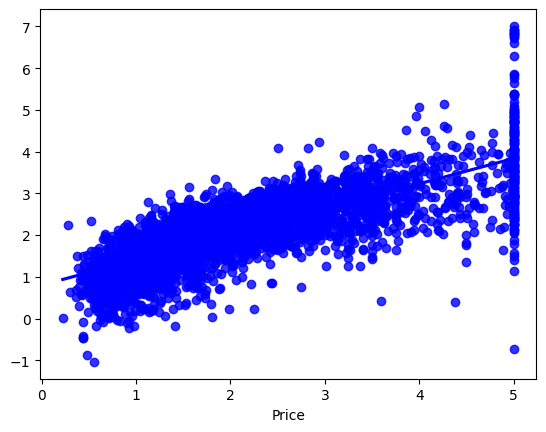

In [ ]:
sns.regplot(x=y_test, y=pred, color = 'blue', ci=None)


In [ ]:
# Polynomial linear regression:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree = 3, include_bias = True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

model = LinearRegression()
model.fit(x_train_trans, y_train)
pred = model.predict(x_test_trans)
print(r2_score(y_test, pred))

-0.605727171969404


In [ ]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("CarPrice_Assignment.csv")
df.shape

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
print(df.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:
df_processed = df.copy()


In [ ]:
df_processed['brand'] = df_processed['CarName'].str.split().str[0]

categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                   'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand']

for col in categorical_cols:
  le = LabelEncoder()
  df_processed[col] = le.fit_transform(df_processed[col].astype(str))
feuature_cols = [col for col in df_processed.columns if col not in ['car_ID', 'CarName', 'price']]
print(f"Selected features: {feuature_cols}")
print(f"Number of features: {len(feuature_cols)}")

Selected features: ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'brand ', 'brand']
Number of features: 25


In [ ]:
x = df_processed[feuature_cols]
y = df_processed['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit(x_test)

lr = LinearRegression()
lr.fit(x_scaled, y_train)

train_pred = lr.predict(x_scaled)
test_pred = lr.predict(x_test_scaled)

print("TRAINING DATASET")
print("MSE: ", mean_squared_error(y_train, train_pred))
print("R2 Score", r2_score(y_train, train_pred))
print("TESTING DATASET: ")
print("MSE: ", mean_squared_error(y_test, test_pred))
print("R2 Score", r2_score(y_test, test_pred))


ValueError: could not convert string to float: 'mazda'

In [ ]:
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': abs(lr.coef_)
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))

plt.subplot(1,3,1)
plt.scatter(y_train, train_pred)
plt.plot([train_pred.min(), train_pred.max()], [train_pred.min(), train_pred.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training: actual vs predicted')


lt.subplot(1, 3, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([test_pred.min(), test_pred.max()], [test_pred.min(), test_pred.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Testing: Actual vs Predicted Prices')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


In [ ]:
model = Sequential()
model.add(Dense(units = 20, input_dim=20, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(x_train, y_train, epocks = 10, batch_size = 32, validation_data = (x_test, y_test))
y_pred = model.predict(x_test)
y_binary_pred = np.round(y_pred)
# threshold = 0.7
# y_pred_labels = (y_pred >= threshold).astype(int)

acc = accuracy_score(y_test, y_binary_pred)
print(acc)

In [ ]:
# for multiple classes
model = Sequential()
model.add(Dense(units = 20, input_dim = 4, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_data=(x_test, y_test))
y_pred = model.predict(x_test)
y_pred_binary = np.round(y_pred)

print(accuracy_score(y_test, y_pred_binary))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'x_train' is not defined

In [ ]:
# MLP for regression:
model = Sequential()
model.add(Dense(units = 20, input_dim = 4, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))

model.compile(loss='mean_sqaured_error', optimizer = 'adam')
model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_data=(x_test, y_test))
y_pred = model.predict(x_test)
y_pred_binary = np.round(y_pred)

print(mean_squared_error(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
heart_df = pd.read_csv('heart.csv')

print("Dataset shape:", heart_df.shape)
print(heart_df.head())
# Check for missing values
print("\nMissing values per column:\n", heart_df.isnull().sum())

# Features and target
X = heart_df.drop("target", axis=1)
y = heart_df["target"].astype(int)  # convert to integer for classification

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

In [ ]:
penalties = ['l1', 'l2', 'elasticnet']
results = []

for pen in penalties:
  if pen in['l1', 'elasticnet']:
    solver = 'saga'
  else:
    solver = 'lbfgs'
  if pen == 'elasticnet':
    model= LogisticRegression(penalty = pen, solver = solver, l1_ration = 0.5, max_iter = 5000, random_state = 42)
  else:
    model = LogisticRegression(penalty = pen, solver = solver, max_iter = 5000, random_state = 42)

  model.fit(x_train, y_train)
  train_pred = model.predict(x_train)
  test_pred = model.predict(x_test)

  results.append([pen, accuracy_score(y_train, train_pred), accuracy_score(y_test, test_pred)])

results_df = pd.DataFrame(results, columns = ['Penalty', 'Training accuracy', 'testing accuracy'])


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

X_train, X_test, y_train, y_test = train_test_split(
    X_iris_scaled, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
solver_results = []

for solver in solvers:
    try:
        model = LogisticRegression(solver=solver, max_iter=5000, multi_class='auto', random_state=42)
        model.fit(X_train, y_train)

        train_acc = accuracy_score(y_train, model.predict(X_train))
        test_acc = accuracy_score(y_test, model.predict(X_test))

        solver_results.append([solver, train_acc, test_acc])

    except Exception as e:
        solver_results.append([solver, None, None])
        print(f"Solver {solver} encountered an error: {e}")

df_solver_results = pd.DataFrame(
    solver_results, columns=["Solver", "Training Accuracy", "Testing Accuracy"]
)

print("\nComparison of Solvers on Iris Dataset:")
print(df_solver_results)


Comparison of Solvers on Iris Dataset:
            Solver  Training Accuracy  Testing Accuracy
0            lbfgs           0.980952          0.911111
1        liblinear           0.933333          0.800000
2        newton-cg           0.980952          0.911111
3  newton-cholesky           0.980952          0.911111
4              sag           0.980952          0.911111
5             saga           0.980952          0.911111


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

InvalidParameterError: The 'multi_class' parameter of LogisticRegression must be a str among {'ovr', 'multinomial', 'auto'}. Got True instead.

In [ ]:
from sklearn.linear_model import Perceptron

lr = LogisticRegression(solver = 'lbfgs', max_iter = 5000, multi_class = True, random_state = 42)
pc = Perceptron(max_iter = 5000, tol = 1e-3, random_state = 42)

lr.fit(x_train, y_train)
pc.it(x_train, y_train)
lr_train_acc = accuracy_score(y_train, lr.predict(x_train))
lr_test_acc = accuracy_score(y_test, lr.predict(x_test))

perceptron_train_acc = accuracy_score(y_train, pc.predict(x_train))
perceptron_test_acc = accuracy_score(y_test, pc.predict(x_test))

# Comparison
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Perceptron"],
    "Training Accuracy": [lr_train_acc, perceptron_train_acc],
    "Testing Accuracy": [lr_test_acc, perceptron_test_acc]
})

print("\nComparison of Logistic Regression vs Perceptron:")
print(comparison)

In [ ]:
#

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)
# 1. Load dataset
data = pd.read_csv("creditCard.csv")

print("Preview of dataset:\n", data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing values:\n", data.isnull().sum())
print("\nBasic statistics:\n", data.describe())

# 2. Split features and target
features = data.drop("Class", axis=1)   # all columns except label
labels = data["Class"]                  # fraud = 1, not fraud = 0

# 3. Scale the numeric data for better training
normalizer = StandardScaler()
features_scaled = normalizer.fit_transform(features)

# Train/test division
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, labels, test_size=0.20, random_state=42
)

model = Sequential()

model.add(Dense(128, input_dim = X.shape[1], activation = 'relu'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss = 'binary', metrics = ['accuracy', 'f1_score', 'precision'])

history = model.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_data = (x_test, y_test))

y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Test Performance ---")
print("Accuracy :", acc)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

FileNotFoundError: [Errno 2] No such file or directory: 'creditCard.csv'

In [ ]:
# usinf sklearn.neural_network
# ================================
# EMPLOYEE SALARY (REGRESSION)
# ================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

# Load data
df = pd.read_csv("employee_salary.csv")

# Separate features and target
X = df.drop("Salary", axis=1)
y = df["Salary"]

# Encoding categorical columns (if any)
X = pd.get_dummies(X, drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (optional but required for exam)
pca = PCA(n_components=0.95)   # keep 95% variance
X_pca = pca.fit_transform(X_scaled)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# ------------------------------------------------
# Train Neural Networks with different optimizers
# ------------------------------------------------

optimizers = ["sgd", "sgd", "adam", "adam"]
momentum = [0, 0.9, 0, 0]    # SGD, SGD+momentum, Adam, AdamW placeholder
names = ["SGD", "SGD + Momentum", "Adam", "Adam (2nd run)"]

for name, opt, m in zip(names, optimizers, momentum):
    print(f"\n========== {name} ==========")

    model = MLPRegressor(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver=opt,               # gradient descent method
        momentum=m,               # only applies to SGD
        learning_rate_init=0.001,
        max_iter=500,
        random_state=42
    )

    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    print("MSE:", mean_squared_error(y_test, preds))
    print("RMSE:", mean_squared_error(y_test, preds, squared=False))
    print("R2 Score:", r2_score(y_test, preds))


In [ ]:
# ================================
# LOAN APPROVAL (CLASSIFICATION)
# ================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier

# Load data
df = pd.read_csv("loan_data.csv")

# Separate features & target
X = df.drop("LoanApproved", axis=1)
y = df["LoanApproved"]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (optional but recommended)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# ------------------------------------------------
# Train Neural Networks with different optimizers
# ------------------------------------------------

optimizers = ["sgd", "sgd", "adam"]
momentum = [0, 0.9, 0]
names = ["SGD", "SGD + Momentum", "Adam"]

for name, opt, m in zip(names, optimizers, momentum):
    print(f"\n========== {name} ==========")

    model = MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",        # good for classification
        solver=opt,
        momentum=m,
        learning_rate_init=0.001,
        max_iter=500,
        random_state=42
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, preds))
    print("F1 Score:", f1_score(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))


# **KMEANS AND PCA**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_scaled)

labels = kmeans.labels_
df['Cluster'] = labels
centroids = kmeans.cluster_centers_
df.head(100)
print(centroids)

[[-0.16840578 -0.9726981   0.2598706   0.17543327]
 [-1.00206653  0.90625492 -1.30310821 -1.25634413]
 [ 1.03359865  0.00613858  0.94360463  0.9725624 ]]


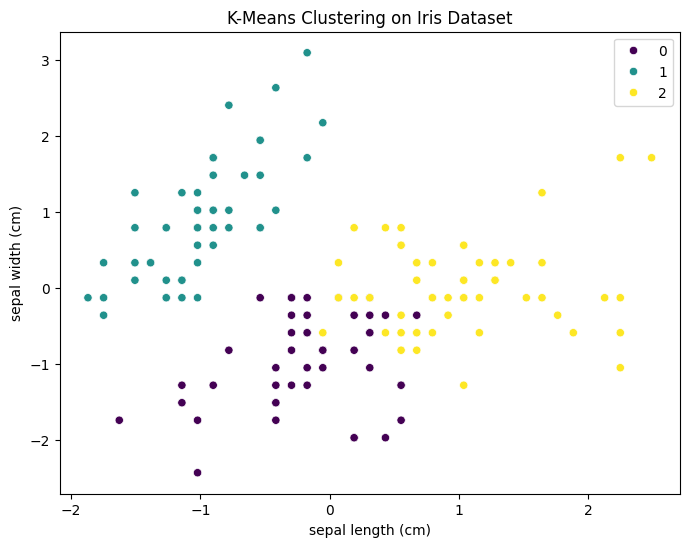


Cluster vs Actual labels:
Cluster  Actual
0        0          1
         1         37
         2          8
1        0         49
2        1         13
         2         42
dtype: int64


In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("K-Means Clustering on Iris Dataset")
plt.show()
y=iris.target
# ==========================
# Optional: Compare with actual species
# ==========================
df['Actual'] = y
print("\nCluster vs Actual labels:")
print(df.groupby(['Cluster','Actual']).size())

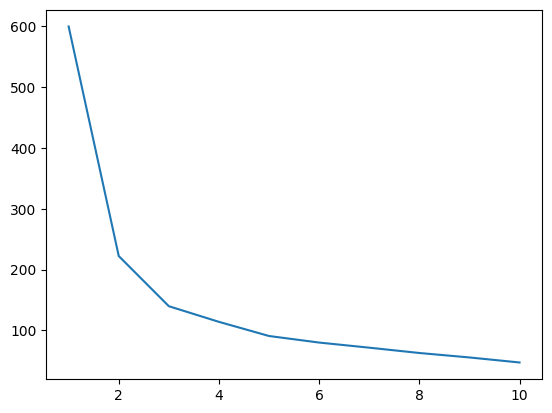

In [ ]:
# choosingthe optimal value of k =, using elbow method
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.show()

In [ ]:
# optimal k value = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df)

PCA using sklearn and from scratch

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
x_new = pca.fit_transform(x)

pca.get_covariance()
explained_variance = pca.explained_variance_ratio_
explained_variance

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
x= data.data
y = data.target
df = pd.DataFrame(x, columns = data.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaled)
explained_variance = pca.explained_variance_ratio_
print("\nExplained variance ratio:", explained_variance)
print("Total variance explained by 2 components:", explained_variance.sum())


Explained variance ratio: [0.72962445 0.22850762]
Total variance explained by 2 components: 0.9581320720000166


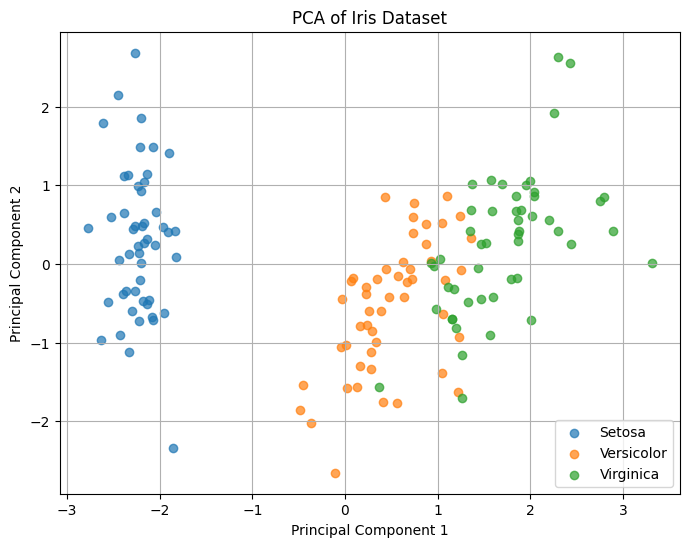

In [ ]:
import matplotlib.pyplot as plt

df_pca = pd.DataFrame(x_pca, columns = ['PC1', 'PC2'])
df_pca['species']=y
plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b']
species = ['Setosa', 'Versicolor', 'Virginica']

for i, color in enumerate(colors):
    plt.scatter(df_pca[df_pca['species']==i]['PC1'],
                df_pca[df_pca['species']==i]['PC2'],
                label=species[i],
                alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

Feature selection methods

In [ ]:
# the very first step is to separate the target column from data and make a copy of the dataframe
y = heart_df['target']
x= df.drop('target', axis = 1)

In [ ]:
# chi2 for classification
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

chi_selector = SelectKBest(chi2, k = 5)
x_new = chi_selector.fit_transform(x_scaled, y)

selected_features = x.columns[chi_selector.get_support()]
print(selected_features)

# for showing scores
print(chi_selector.scores_)

In [ ]:
#anova f-test for classification
# Use when:
# Features = numerical
# Target = categorical

from sklearn.feature_selection import SelectKBest, f_classif

anova_selector = SelectKBest(score_func = f_classif, k = 5)
x_new = anova_selector.fit_transform(x, y)

selected_features = x.columns[anova_selector.get_support()]

anova_scores = anova_selector.scores_
print("Anova f-scores")
for name, score in zip(x.columns, anova_score):
  print(f"{name}: {score}")

x_selected = pd.DataFrame(x_selected, columns = selected_features)

In [ ]:
# Mutual info classification
# Use when:
# You expect non-linear relationships
# Works for categorical + numerical features

from sklearn.feature_selection import mutual_info_classif, SelectKBest

mi_selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_new = mi_selector.fit_transform(X, y)

selected_features = X.columns[mi_selector.get_support()]
print("\nMutual Information selected features:\n", selected_features)

mi_scores = mi_selector.scores_
print("MI scores:")
for name, score in zip(X.columns, mi_scores):
    print(f"{name}: {score:.4f}")

In [ ]:
#correlation filtering:

import numpy as np

corr = df.corr(numeric_only = True)
threshold = 0.85
corr_pairs = corr.abs().unstack.sort_values(ascending = True)

corr_pairs = corr_pairs[corr_pairs < 1]



In [ ]:
# (A) Pearson Correlation — regression
# Find top correlated features with the target.
correlations = df.corr(numeric_only=True)["target"].sort_values(ascending=False)

print("\nPearson Correlation with target:")
print(correlations)

# Best correlated predictors (top 5)
top_features = correlations.iloc[1:6].index
print("\nTop correlated features:", list(top_features))

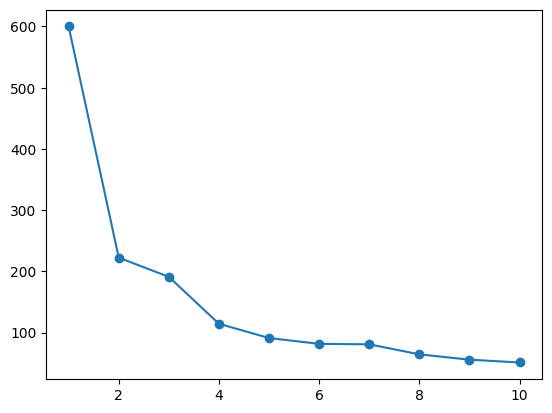

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

iris = load_iris()
x= iris.data
y= iris.target

x = pd.DataFrame(x, columns = iris.feature_names)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
wcss = []
for i in range(1, 11):
  model=KMeans(n_clusters = i, random_state = 42)
  model.fit(x_scaled)
  wcss.append(model.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker = 'o')
plt.show()

In [ ]:
model = KMeans(n_clusters = 3, max_iter = 300, init = 'k-means++', random_state = 42)
x['cluster'] = model.fit_predict(x_scaled)
print("Cluster centers: " ,model.cluster_centers_)

Cluster centers:  [[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


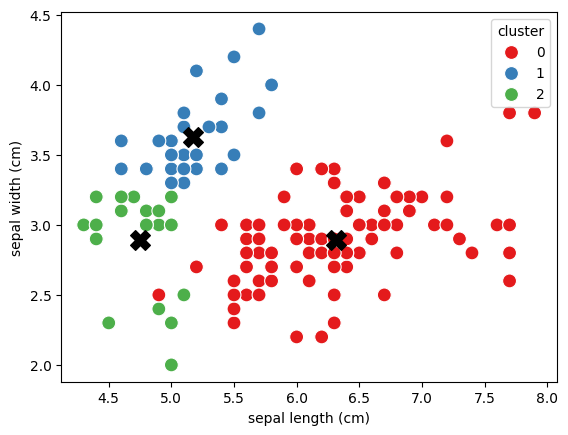

In [ ]:

centroids = scaler.inverse_transform(model.cluster_centers_)
plt.figure()
sns.scatterplot(
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue='cluster',
    data=x,
    palette='Set1',
    s=100
)

plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=200,
    c='black',
    marker='X',
    label='Centroids'
)
